In [1]:
using PyPlot

# Tarea 3

## Eigenvalores de una matriz hermitiana aleatoria

In [2]:
# Se crea una matriz hermitiana que es aleatoria y se regresan sus eigenvalores
function randHermitian(n)
    a = rand(n,n)+1im*rand(n,n)
    b = a+conj(transpose(a))
    return eigvals(b)
end

randHermitian (generic function with 1 method)

* Generar una matriz hermitiana de $n\times n$, calcular sus eigenvalores, y calcular la distribución de la diferencia entre eigenvalores consecutivos

In [3]:
# Se generan varias matrices de dimension n y se calculan las diferencias entre eigenvalores consecutivos
function dif_cons(n, m)
    diferencias = []
    for i in 1:m
        eigenH = randHermitian(n)
        for j in 1:n-1
            push!(diferencias, eigenH[j+1]-eigenH[j])
        end
    end
    return diferencias
end

dif_cons (generic function with 1 method)

### Para matrices de 7x7

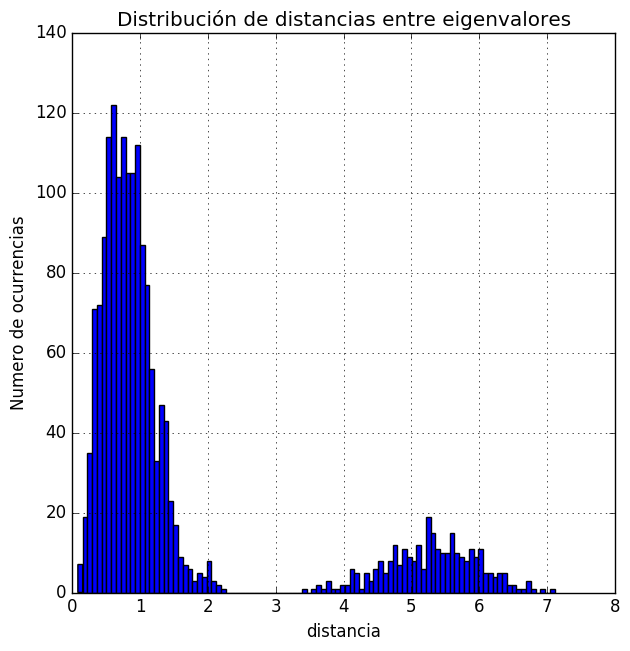

PyObject <matplotlib.text.Text object at 0x31436dd50>

In [4]:
fig = figure("pyplot_subplot_mixed",figsize=(7,7))
a = dif_cons(7, 300)
h = plt[:hist](a, 100)
grid("on")
xlabel("distancia")
ylabel("Numero de ocurrencias")
title("Distribución de distancias entre eigenvalores")

### Para matrices de 20x20

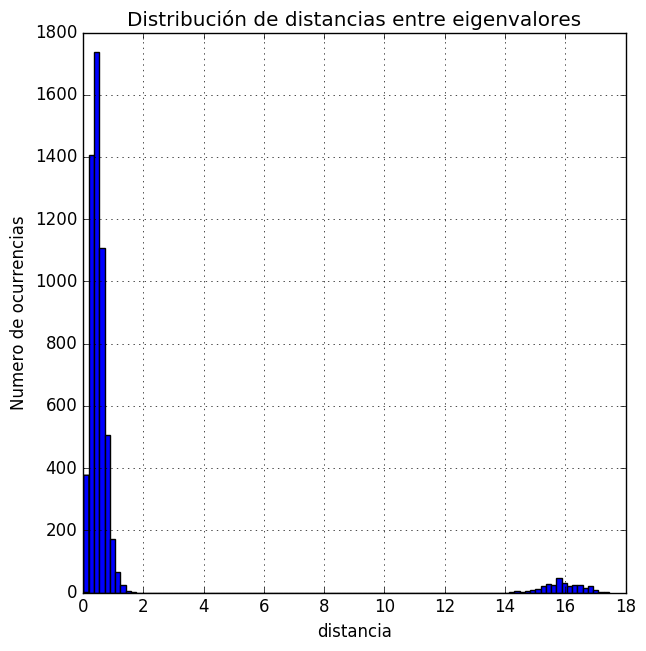

PyObject <matplotlib.text.Text object at 0x306b1a150>

In [5]:
fig = figure("pyplot_subplot_mixed",figsize=(7,7))
a = dif_cons(20, 300)
h = plt[:hist](a, 100)
grid("on")
xlabel("distancia")
ylabel("Numero de ocurrencias")
title("Distribución de distancias entre eigenvalores")

## Envolvente convexa

Dados un conjunto de puntos en el plano se trata de encontrar la envolvente convexa del conjunto.

In [6]:
# Se determina quien es el punto mas alejado
function pto_lejano(puntos_centrados)
    N = size(puntos_centrados)[2]
    r_max = zeros(N)
    for i in 1:N
        r_max[i] = puntos_centrados[1,i]*puntos_centrados[1,i]+puntos_centrados[2,i]*puntos_centrados[2,i]
    end

    r = 0.0
    idx = 0
    for i in 1:N
        if r_max[i] > r
            r = r_max[i]
            idx = i
        end
    end
    return idx
end;

# Una funcion que dibuja una linea entre 2 puntos
function draw_line(R1, R2)
    n = 4
    if R1[1]<R2[1]
        x = linspace(R1[1], R2[1], n)
        y = R1[2]*ones(n) + ((R2[2]-R1[2])/(R2[1]-R1[1]))*(x-R1[1]*ones(n))
    else
        x = linspace(R2[1], R1[1], 4)
        y = R2[2]*ones(n) + ((R1[2]-R2[2])/(R1[1]-R2[1]))*(x-R2[1]*ones(n))
    end
    plot(x, y)
end;

# Un funcion que calcula los angulos entre los puntos
function angles(ri, puntos)
    N = size(puntos[1,:])[2]
    angulos_i_j = zeros(N)
    c = 0
    for j in 1:N
        a = ri[1]*puntos[1,j] + ri[2]*puntos[2,j]
        b = sqrt((ri[1]*ri[1]+ri[2]*ri[2]) * (puntos[1,j]*puntos[1,j]+puntos[2,j]*puntos[2,j]))
        
        if b > 1.0e-6
            angulos_i_j[j] = acos(a/b)
        else
            angulos_i_j[j] = 10
        end
    end
    
    return angulos_i_j
end;
    
# Se crea una funcion que centra los puntos alrededor de un punto en particular
function centrar_puntos(r_c, puntos)
    recentrar = zeros(2, size(puntos[1,:])[2])
    for i in 1:size(puntos[1,:])[2]
        recentrar[:,i] = puntos[:,i] - r_c
    end
    return recentrar
end;

# Se crea una funcion que calcula el siguiente vertice
function sig_vertice(id_i, puntos, id1, id2)
    ri = puntos[:,id_i]
    recentrar = centrar_puntos(ri, puntos)
    if id2==0
        n_rad = [-ri[2]/norm(ri), ri[1]/norm(ri)]
    else
        n_rad = puntos[:,id1] - puntos[:,id2]
    end
    
    indmin_ang = indmin(angles(n_rad, recentrar))

    return indmin_ang
end;

# Se crea la funcion que va creando el poligono
function poligono(N, puntos, graph=true)
    if graph
        scatter(puntos[1,:], puntos[2,:], color="red")
        grid("on")
        axis(:equal)
    end
    # Se calcula el centro de masa
    C_masa = [sum(puntos[i,:])/N for i in 1:2]
    
    # Se coloca el sistema en el sistema de referencia del centro de masa
    puntos_centrados = centrar_puntos(C_masa, puntos)
    id_max = pto_lejano(puntos_centrados)
    
    indices = zeros(N)
    indices[1] = id_max
    
    for i in 2:N
        if i == 2
            id_temp = sig_vertice(indices[1], puntos, indices[1],0)
        else
            id_temp = sig_vertice(indices[i-1], puntos, indices[i-1], indices[i-2])
        end
        
        if length(find(X -> X == id_temp, indices)) == 0
            indices[i] = id_temp
            if graph
                draw_line(puntos[:,indices[i-1]], puntos[:,indices[i]])
            end
        else
            indices[i] = id_temp
            if graph
                draw_line(puntos[:,indices[i-1]], puntos[:,indices[i]])
            end
            if graph
                return "Se termino el poligono, tiene N = $(i-1) lados"
            else
                return i-1
            end
        end 
    end
end;

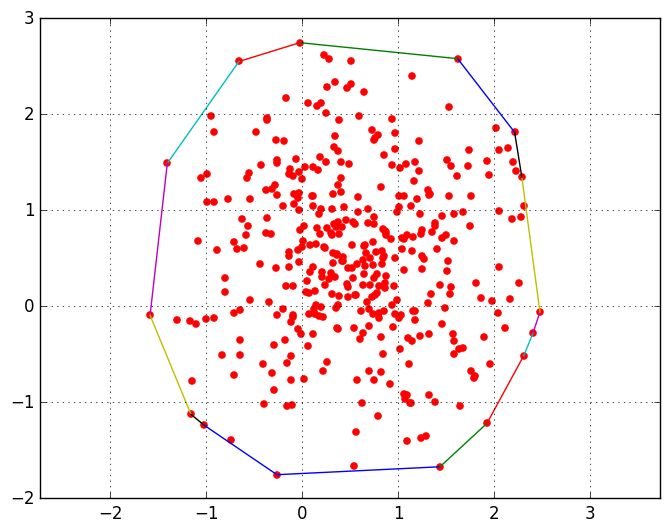

"Se termino el poligono, tiene N = 15 lados"

In [9]:
# Defino el numero de puntos aleatorios en el plano y se crean
N = 390

theta = rand(N)
r = 2*rand(N)
pnts = zeros(2,N)
for i in 1:N
    pnts[:,i] = [r[i]*cos(2*pi*theta[i]) , r[i]*sin(2*pi*theta[i])] + rand(2)
end

poligono(N, pnts)

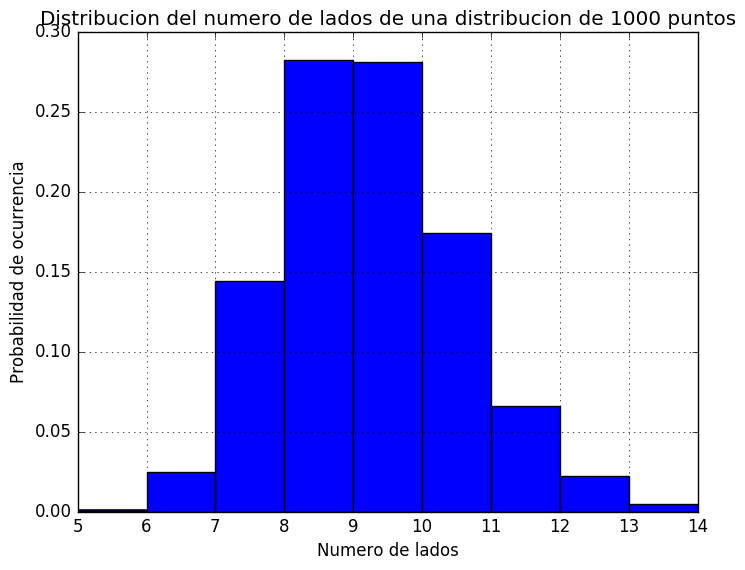

In [8]:
# Defino el numero de puntos aleatorios en el plano y se crean
N = 50
M = 1000
lados = zeros(M)
for j in 1:M
    theta = rand(N)
    r = 2*rand(N)
    pnts = zeros(2,N)
    for i in 1:N
        pnts[:,i] = [r[i]*cos(2*pi*theta[i]) , r[i]*sin(2*pi*theta[i])] + rand(2)
    end
    
    lados[j] = poligono(N, pnts, false)
end

N = maximum(lados)-minimum(lados)
grid("on")
xlabel("Numero de lados")
ylabel("Probabilidad de ocurrencia")
title("Distribucion del numero de lados de una distribucion de $M puntos")
plt[:hist](lados, N, normed="True");